In [48]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
import math
import statistics
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

In [75]:
def get_data(filename):
    
    dirty_data = pd.read_csv(filename, sep=',')
    variables = ['Open', 'Close', 'Volume']
    data = dirty_data[variables]
    
    data['Change'] = [y - x for x, y in zip(data['Open'], data['Close'])]
    data['Percent'] = [100*y/x for x, y in zip(data['Open'], data['Change'])]
    data['AbsPercent'] = [abs(x) for x in data['Percent']]
    
    return data

In [76]:
data1 = get_data('AAPL.csv')
data2 = get_data('AMZN.csv')
data3 = get_data('OGZPY.csv')

<ipython-input-75-4afdb284820c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Change'] = [y - x for x, y in zip(data['Open'], data['Close'])]
<ipython-input-75-4afdb284820c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Percent'] = [100*y/x for x, y in zip(data['Open'], data['Change'])]
<ipython-input-75-4afdb284820c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

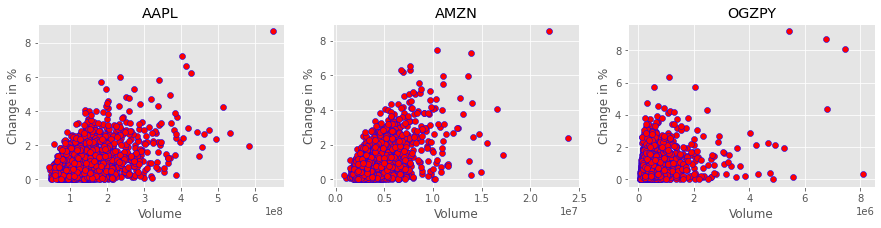

In [95]:
fig, graph = plt.subplots(
    nrows=1, ncols=3,
    figsize=(15, 3)
)

for gr, data, stock in zip(graph, [data1, data2, data3], ['AAPL', 'AMZN', 'OGZPY']):
    
    gr.scatter(x=data['Volume'], y=data['AbsPercent'], marker='o', c='r', edgecolor='b')
    gr.set_title(f'{stock}')
    gr.set_xlabel('Volume')
    gr.set_ylabel('Change in %')

plt.show()

## Теперь будем считать корреляцию в зависимости от p
### Пишем функцию от p

In [110]:
def correlation(p, data):

    subdata = data[data['AbsPercent'] >= p]
    corr = subdata[subdata.columns[2:3]].corrwith(subdata[subdata.columns[-1]])
    
    return p, corr

def correlation_minus(p, data):

    subdata = data[data['AbsPercent'] >= p]
    corr = subdata[subdata.columns[2:3]].corrwith(subdata[subdata.columns[-2]])
    
    return p, corr

/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divid

/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divid

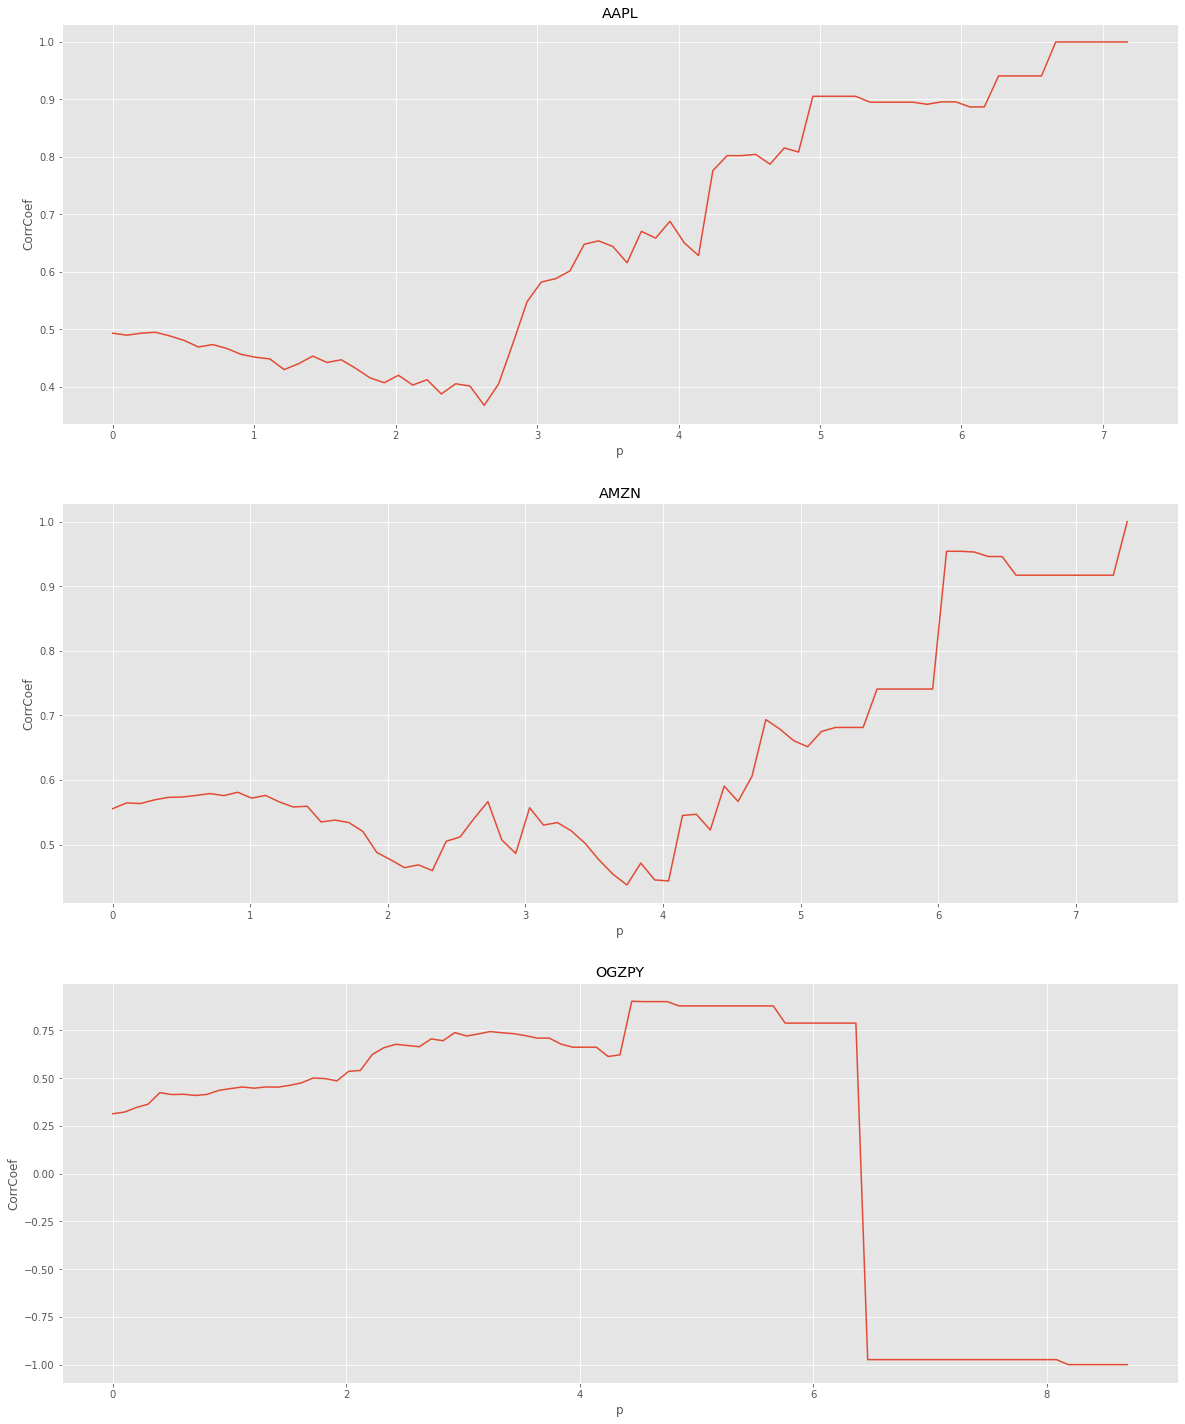

In [113]:
fig, graph = plt.subplots(
    nrows=3, ncols=1,
    figsize=(20, 25)
)

for gr, data, stock in zip(graph, [data1, data2, data3], ['AAPL', 'AMZN', 'OGZPY']):
    
    p_list = []
    corr_list = []
    
    for p in np.linspace(0, 10, 100):
        p, corr = correlation(p, data)
        p_list.append(p)
        corr_list.append(corr)
    
    
    gr.plot(p_list, corr_list)
    gr.set_title(f'{stock}')
    gr.set_xlabel('p')
    gr.set_ylabel('CorrCoef')

plt.show()

/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divid

/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Dima/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divid

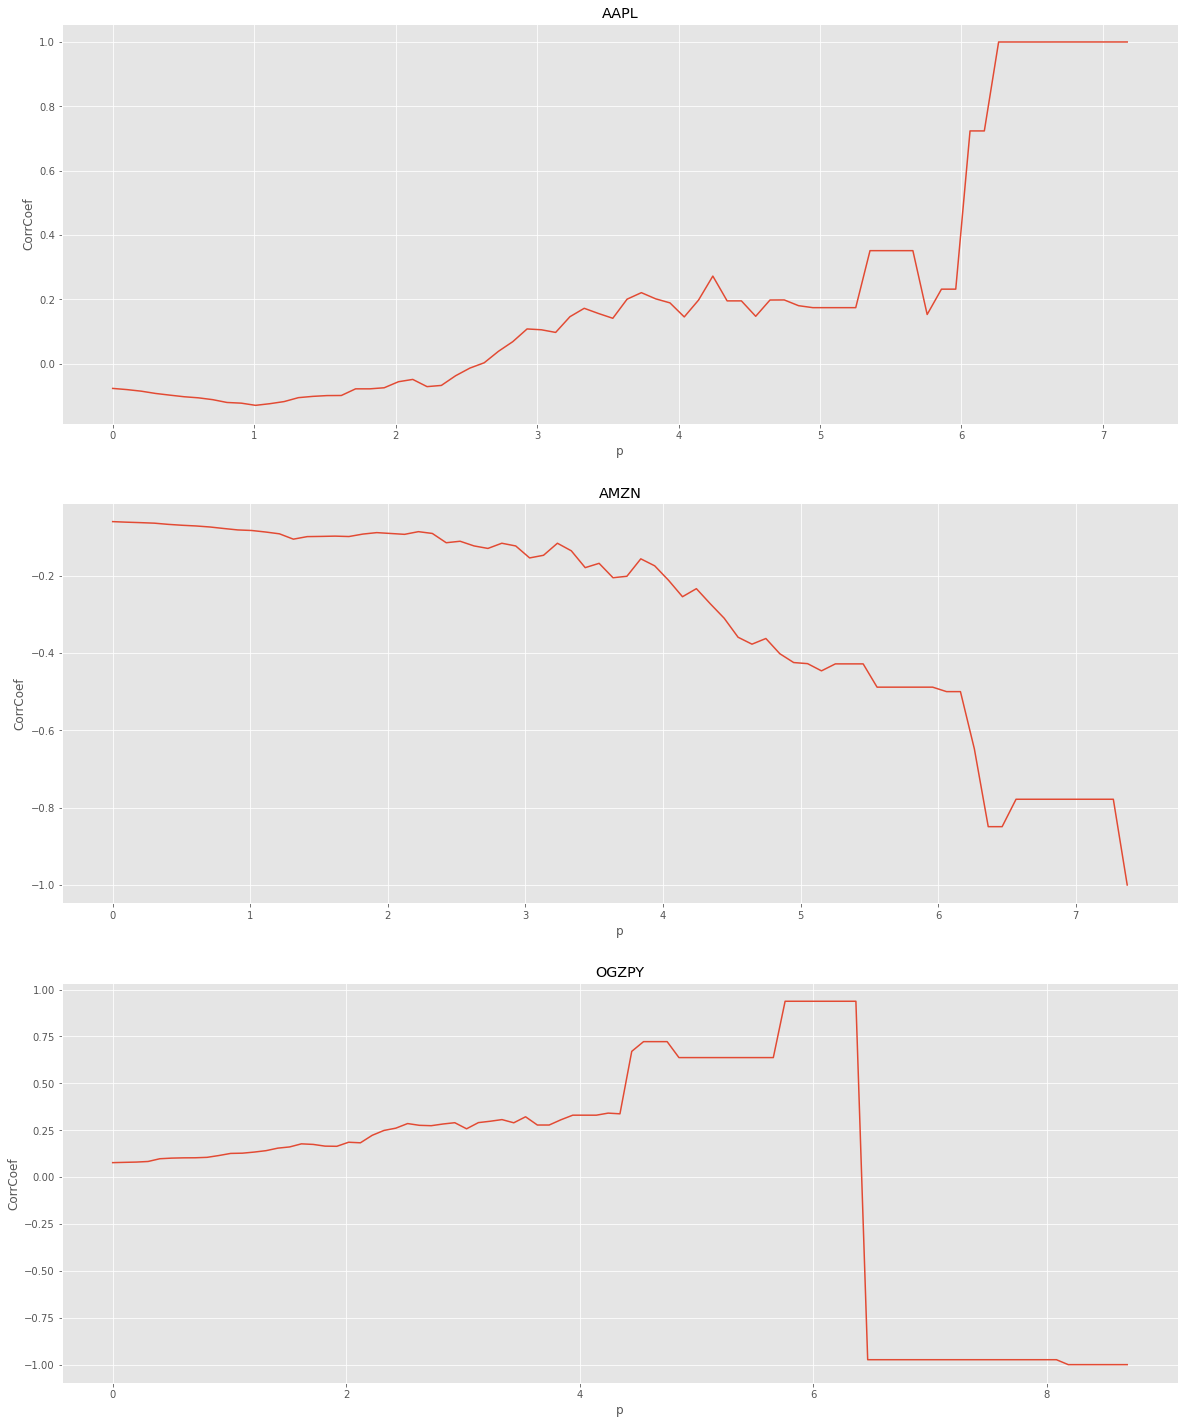

In [111]:
fig, graph = plt.subplots(
    nrows=3, ncols=1,
    figsize=(20, 25)
)

for gr, data, stock in zip(graph, [data1, data2, data3], ['AAPL', 'AMZN', 'OGZPY']):
    
    p_list = []
    corr_list = []
    
    for p in np.linspace(0, 10, 100):
        p, corr = correlation_minus(p, data)
        p_list.append(p)
        corr_list.append(corr)
    
    
    gr.plot(p_list, corr_list)
    gr.set_title(f'{stock}')
    gr.set_xlabel('p')
    gr.set_ylabel('CorrCoef')

plt.show()